In [583]:
import matplotlib.pyplot as plt
import numpy as np
import math

***Part 1: Shape Fit***

Smoothing The *Curve*

In [584]:
def BoxcarAVG(Points, n):
    '''
    I know the data will be noisy, so I'll smooth down the curve
    '''
    # Let n be an odd number, 3 or 5 for example
    side = n // 2
    for i in range(side, len(Points) - side):
        Points[i][1] = sum([p[1] for p in Points[i - side:i + side + 1]]) / n
    return Points

***Part 2: Shape Area***

In [585]:
non_intersecting_polygon = [(1.35,2.1),(2.69,4),(5.1,3),(7.9,5.8),(11,0.6),(7,-0.5),(8.7,-1.9),(5.32,-3.8),(-1,-2.5),(2.5,-1.5)]
intersecting_polygon = [[0,0],[10,0],[5,5],[0,10],[10,10],[9,9],[6,6],[2,2]]
penis = [(4,1),(3,1),(2,2),(2,3),(3,4),(4,3),(4,9),(3,9),(3,10),(4,11),(6,11),(7,10),(7,9),(6,9),(6,3),(7,4),(8,3),(8,2),(7,1),(6,1),(5,2)]

Sorting the points of a polygon in a clockwise order before executing the area calculation algorithms has several benefits:

Consistency: By sorting the points in a consistent order, you can ensure that the area calculation algorithm will always return the same result, regardless of the order in which the points were originally given.

Simplicity: By sorting the points in a clockwise order, you can simplify the implementation of the area calculation algorithm. For example, the shoelace formula, which is a general formula for calculating the area of a polygon, is more straightforward to implement when the points are sorted in a clockwise order.

Self-intersecting polygons: For self-intersecting polygons, it will not work as expected because the area will be calculated with the intersections and it will give an area that is not correct. For self-intersecting polygons, it's recommended to detect and remove the self-intersections before applying any of the area calculation algorithms.

In summary, sorting the points before executing the area calculation algorithms will ensure the correct and consistent results for simple polygons and it's a good practice to apply, but for self-intersecting polygons it's required to detect and remove the self-intersections.

In [586]:
def SimplePolygonArea(points):
  def clockwise_sort(points):
    # Find the point with the smallest y-coordinate
    reference_point = min(points, key=lambda point: (point[1], point[0]))

    # Sort the other points by polar angle with respect to the reference point
    sorted_points = sorted(points, key=lambda point: math.atan2(point[1] - reference_point[1], point[0] - reference_point[0]))

    return sorted_points

  def polygon_area_shoelace(points):
    # Can only handle points stored in arrays, not tuples      
    points.append(points[0])
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
  
  
  points = clockwise_sort(points)
  polygon_area = polygon_area_shoelace(points)
  return polygon_area



In this example, points list defines the vertices of the polygon and first we find the bounding box of the points, then we create a grid of zeroes that has the same size as the bounding box. Then we iterate through all the cells of the grid and check if each cell is inside the polygon or not using the is_point_in_polygon function that you can implement yourself. It can be done using the ray casting algorithm, the winding number algorithm or by using the cross product. Finally, we pass the grid and threshold to the marching_squares function to extract the contours.

Please note that in the above example, the is_point_in_polygon function is not implemented and you will need to implement it yourself to check if a point is inside the polygon, and it may not be efficient for large polygons.

In [587]:
def ComplexPolygonArea(points,gridsize_factor=1,threshold=0.5):
  # Find the bounding box of the points
  minx = min(x for x, y in points)
  maxx = max(x for x, y in points)
  miny = min(y for x, y in points)
  maxy = max(y for x, y in points)

  grid_size = (int(maxy - miny)*gridsize_factor, int(maxx - minx)*gridsize_factor)
  def GetGrid(points,grid_size):
    def ray_intersects_segment(x, y, p1, p2):
        x1, y1 = p1
        x2, y2 = p2
        
        # Check if the point is on the right of the line segment
        if x < min(x1, x2):
            return False
        
        # Check if the point is above or below the line segment
        if y > max(y1, y2) or y < min(y1, y2):
            return False
        
        # Check if the point is on the same side of the line as the segment's endpoints
        if (x1 - x2)*(y - y1) - (y1 - y2)*(x - x1) > 0:
            return False
        
        # If the point passes all checks, it must be on the correct side of the line
        return True
    grid = np.zeros(grid_size)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            # Cast a ray from the point (minx + j, miny + i) in the positive x direction
            intersections = 0
            for p1, p2 in zip(points, points[1:] + [points[0]]):
                if ray_intersects_segment(minx + j, miny + i, p1, p2):
                    intersections += 1
            if intersections % 2 == 1:
                grid[i][j] = 1
    return grid
  
  grid = GetGrid(points,grid_size)
  def marching_squares(grid, threshold):
      contours = []
      grid = np.array(grid)
      for i in range(grid.shape[0] - 1):
          for j in range(grid.shape[1] - 1):
              square = [[i, j], [i + 1, j], [i + 1, j + 1], [i, j + 1]]
              values = [grid[x][y] for x, y in square]
              edges = []
              if values[0] < threshold:
                  edges.append((square[0], square[3]))
              if values[1] < threshold:
                  edges.append((square[0], square[1]))
              if values[2] < threshold:
                  edges.append((square[1], square[2]))
              if values[3] < threshold:
                  edges.append((square[2], square[3]))
              if len(edges) > 0:
                  contours.append(edges)
      return contours
  contours = marching_squares(grid, threshold)
  cell_area = (maxx - minx)/grid_size[1] * (maxy - miny)/grid_size[0]
  polygon_area = np.sum(grid) * cell_area
  return polygon_area


In [588]:
def Area(points):
    def RayCastAlgorithm(vertices):  # Checks if the polygon intersects
    # A function to check if a point is on the left side of a line
      def is_left(p0, p1, p2):
          return (p1[0] - p0[0]) * (p2[1] - p0[1]) - (p2[0] - p0[0]) * (p1[1] - p0[1]) > 0

      # Check if any two edges of the polygon intersect
      for i in range(len(vertices)):
          p1 = vertices[i]
          p2 = vertices[(i + 1) % len(vertices)]
          for j in range(i + 2, len(vertices) + i - 1):
              p3 = vertices[j % len(vertices)]
              p4 = vertices[(j + 1) % len(vertices)]
              if is_left(p1, p3, p4) != is_left(p2, p3, p4) and is_left(p1, p2, p3) != is_left(p1, p2, p4):
                  return True
      return False

    if RayCastAlgorithm(points) == False:
      print(RayCastAlgorithm(points))
      
      return SimplePolygonArea(points)
    else:
      return ComplexPolygonArea(points)

In [589]:
def PlotPolygon(points):
  x_values = [p[0] for p in points]
  y_values = [p[1] for p in points]
  # Plot:
    
  #connecting all the points using lines 
  plt.plot(x_values,y_values,color='blue')
  plt.plot([x_values[-1],x_values[0]],[y_values[-1],y_values[0]],color='grey') # The line that connects the first and last points

  #scattering the points
  plt.scatter(x_values, y_values, color='red', label='Scatter Data')

  #setting x and y axis limits
  plt.xlim(-5, 25)
  plt.ylim(-5, 20)
  plt.legend()
  plt.xlabel('X-axis Label')
  plt.ylabel('Y-axis Label')
  plt.title('Polygon')

  #displaying the graph
  plt.show()

False
46.34799999999999


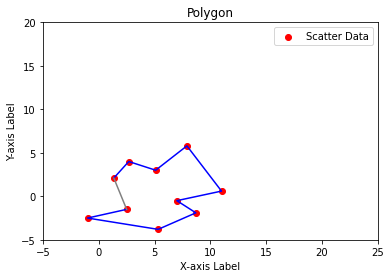

None
50.0


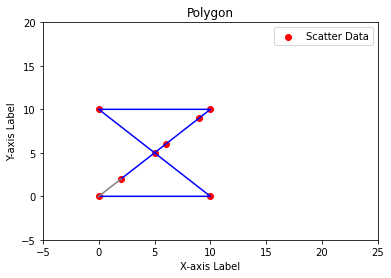

None
False
29.5


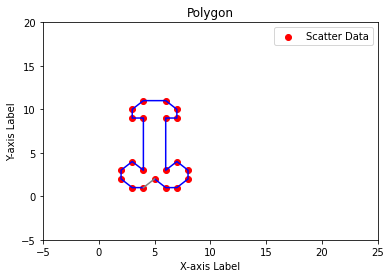

None


In [590]:
print(Area(non_intersecting_polygon))
print(PlotPolygon(non_intersecting_polygon))
print(Area(intersecting_polygon))
print(PlotPolygon(intersecting_polygon))
print(Area(penis))
print(PlotPolygon(penis))

השטח המתקבל אם אני מפעיל את המיון לפי הנקודות בפשוט או לא הוא שונה. להבין מה יותר מדויק